# CellPhoneDB

**Language:** Python

**Paper:** Efremova, M., et al., CellPhoneDB: inferring cell-cell communication from combined expression of multi-subunit ligand-receptor complexes. Nat Protoc, 2020. 15(4): p. 1484-1506.

**Code Resource:** https://github.com/Teichlab/cellphonedb

**Claiming:** Inference of intercellular signaling networks (ligand-receptor)

**Method:** Empirical shuffling and statistical test

**Database:** From databases and previous studies: 1. secreted and membrane proteins; 2. protein complexes; 3. protein-protein interactions

## Input
1. scRNA-seq data: gene-expression matrix (recommended normalized) with rows as genes (ensemble IDs) and columns as cells
2. cell type annotation: barcode and cell type

Here, we will use the example .txt data of the matrix and annotation from https://github.com/Teichlab/cellphonedb:

Download link: https://zenodo.org/record/5024466/files/cellphonedb_example_data.zip?download=1


## Installation
Works with Python v3.6 or greater. It is highly recommended using an isolated python environment using conda or virtualenv.

1. Create python=>3.6 environment

 * Using conda: `conda create -n cpdb python=3.7`

 * Using virtualenv: `python -m venv cpdb`


2. Activate environment

 * Using conda: `source activate cpdb`

 * Using virtualenv: `source cpdb/bin/activate`


3. Install CellPhoneDB `pip install cellphonedb`


### Running CellPhoneDB Methods
Activate the environment first:

* Using conda: `source activate cpdb`
* Using virtualenv: `source cpdb/bin/activate`


### Example with running the statistical method
 `cellphonedb method statistical_analysis test_meta.txt test_counts.txt`


### Plot statistical method results
Currently there are two plot types available: dot_plot & heatmap_plot

`cellphonedb plot dot_plot`

`cellphonedb plot heatmap_plot test_meta.txt`

All the other parameters are showed at https://github.com/Teichlab/cellphonedb

And all the outputs will be stored in *out* folder.

* The "means.csv" file contains mean values for each ligand-receptor interaction. 
* The "deconvoluted.csv" file gives additional information for each of the interacting partners.
* If the user uses the statistical inference approach, additional "pvalues.csv" and "significant_means.csv" file are generated with the values for the significant interactions.

Check https://www.cellphonedb.org/documentation for more info.

In [7]:
head(read.table("example_data/out/deconvoluted.txt", sep ="\t", header=TRUE, comment.char = ""))

,gene_name,uniprot,is_complex,protein_name,complex_name,id_cp_interaction,NKcells_1,NKcells_0,Tcells,Myeloid
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,CD8A,P01732,True,CD8A_HUMAN,CD8 receptor,CPI-CS0A66DB1CA,0.000,0.162,0,0
2,CD8B,P10966,True,CD8B_HUMAN,CD8 receptor,CPI-CS0A66DB1CA,0.000,0.162,0,0
3,KLRD1,Q13241,True,KLRD1_HUMAN,CD94:NKG2A,CPI-CS0715DE78D,2.281,2.353,0,0
4,KLRD1,Q13241,True,KLRD1_HUMAN,CD94:NKG2C,CPI-CS05AB368CE,2.051,1.558,0,0
5,KLRD1,Q13241,True,KLRD1_HUMAN,CD94:NKG2E,CPI-CS0023FA839,0.425,0.162,0,0
6,KLRC1,P26715,True,NKG2A_HUMAN,CD94:NKG2A,CPI-CS0715DE78D,2.281,2.353,0,0


In [8]:
head(read.table("example_data/out/means.txt", sep ="\t", header=TRUE, comment.char = ""))

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,⋯,NKcells_0.NKcells_1,NKcells_0.Tcells,NKcells_1.Myeloid,NKcells_1.NKcells_0,NKcells_1.NKcells_1,NKcells_1.Tcells,Tcells.Myeloid,Tcells.NKcells_0,Tcells.NKcells_1,Tcells.Tcells
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CPI-SS028784FC6,HLA-DPA1_TNFSF9,simple:HLADPA1,simple:P41273,ENSG00000231389,ENSG00000125657,True,True,False,InnateDB-All,⋯,0.220,0.000,0,0.000,0.000,0.000,0,0,0,0
2,CPI-SS00A8596B5,PVR_TNFSF9,simple:P15151,simple:P41273,ENSG00000073008,ENSG00000125657,True,True,False,InnateDB-All,⋯,0.220,0.000,0,0.000,0.390,0.000,0,0,0,0
3,CPI-SS0B84DAE3D,PVR_CD96,simple:P15151,simple:P40200,ENSG00000073008,ENSG00000153283,True,True,True,curated,⋯,0.346,0.593,0,1.027,0.516,0.763,0,0,0,0
4,CPI-SS0A8627ED6,PVR_CD226,simple:P15151,simple:Q15762,ENSG00000073008,ENSG00000150637,True,True,True,curated,⋯,0.000,0.000,0,0.293,0.000,0.000,0,0,0,0
5,CPI-SS00561BBD7,PVR_TIGIT,simple:P15151,simple:Q495A1,ENSG00000073008,ENSG00000181847,True,True,False,curated,⋯,0.000,0.593,0,0.329,0.000,0.763,0,0,0,0
6,CPI-SC0D19BAF15,FN1_a10b1 complex,simple:P02751,complex:a10b1 complex,ENSG00000115414,,True,False,False,curated,⋯,0.000,0.000,0,0.000,0.000,0.000,0,0,0,0


In [9]:
head(read.table("example_data/out/pvalues.txt", sep ="\t", header=TRUE, comment.char = ""))

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,⋯,NKcells_0.NKcells_1,NKcells_0.Tcells,NKcells_1.Myeloid,NKcells_1.NKcells_0,NKcells_1.NKcells_1,NKcells_1.Tcells,Tcells.Myeloid,Tcells.NKcells_0,Tcells.NKcells_1,Tcells.Tcells
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CPI-SS028784FC6,HLA-DPA1_TNFSF9,simple:HLADPA1,simple:P41273,ENSG00000231389,ENSG00000125657,True,True,False,InnateDB-All,⋯,0.000,1.000,1,1.000,1.000,1.000,1,1,1,1
2,CPI-SS00A8596B5,PVR_TNFSF9,simple:P15151,simple:P41273,ENSG00000073008,ENSG00000125657,True,True,False,InnateDB-All,⋯,0.245,1.000,1,1.000,0.020,1.000,1,1,1,1
3,CPI-SS0B84DAE3D,PVR_CD96,simple:P15151,simple:P40200,ENSG00000073008,ENSG00000153283,True,True,True,curated,⋯,0.848,0.653,1,0.030,0.621,0.494,1,1,1,1
4,CPI-SS0A8627ED6,PVR_CD226,simple:P15151,simple:Q15762,ENSG00000073008,ENSG00000150637,True,True,True,curated,⋯,1.000,1.000,1,0.110,1.000,1.000,1,1,1,1
5,CPI-SS00561BBD7,PVR_TIGIT,simple:P15151,simple:Q495A1,ENSG00000073008,ENSG00000181847,True,True,False,curated,⋯,1.000,0.101,1,0.341,1.000,0.030,1,1,1,1
6,CPI-SC0D19BAF15,FN1_a10b1 complex,simple:P02751,complex:a10b1 complex,ENSG00000115414,,True,False,False,curated,⋯,1.000,1.000,1,1.000,1.000,1.000,1,1,1,1


In [10]:
head(read.table("example_data/out/significant_means.txt", sep ="\t", header=TRUE, comment.char = ""))

,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,⋯,NKcells_0.NKcells_1,NKcells_0.Tcells,NKcells_1.Myeloid,NKcells_1.NKcells_0,NKcells_1.NKcells_1,NKcells_1.Tcells,Tcells.Myeloid,Tcells.NKcells_0,Tcells.NKcells_1,Tcells.Tcells
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CPI-SS028784FC6,HLA-DPA1_TNFSF9,simple:HLADPA1,simple:P41273,ENSG00000231389,ENSG00000125657,True,True,False,InnateDB-All,⋯,0.22,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,CPI-SS02770D68F,NOTCH2_JAG2,simple:Q04721,simple:Q9Y219,ENSG00000134250,ENSG00000184916,False,True,False,curated,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,CPI-SS0F8C664D9,CXCR3_CCL20,simple:P49682,simple:P78556,ENSG00000186810,ENSG00000115009,True,True,False,guidetopharmacology.org,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1.461,NA
4,CPI-SS07D9A48A2,LTA_TNFRSF1B,simple:P01374,simple:P20333,ENSG00000226979,ENSG00000028137,True,False,True,curated,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,CPI-SS0E7D5974D,TNF_TNFRSF1B,simple:P01375,simple:P20333,ENSG00000232810,ENSG00000028137,True,False,True,curated,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,CPI-SS08B7D54A3,TNF_FAS,simple:P01375,simple:P25445,ENSG00000232810,ENSG00000026103,True,False,True,InnateDB-All,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


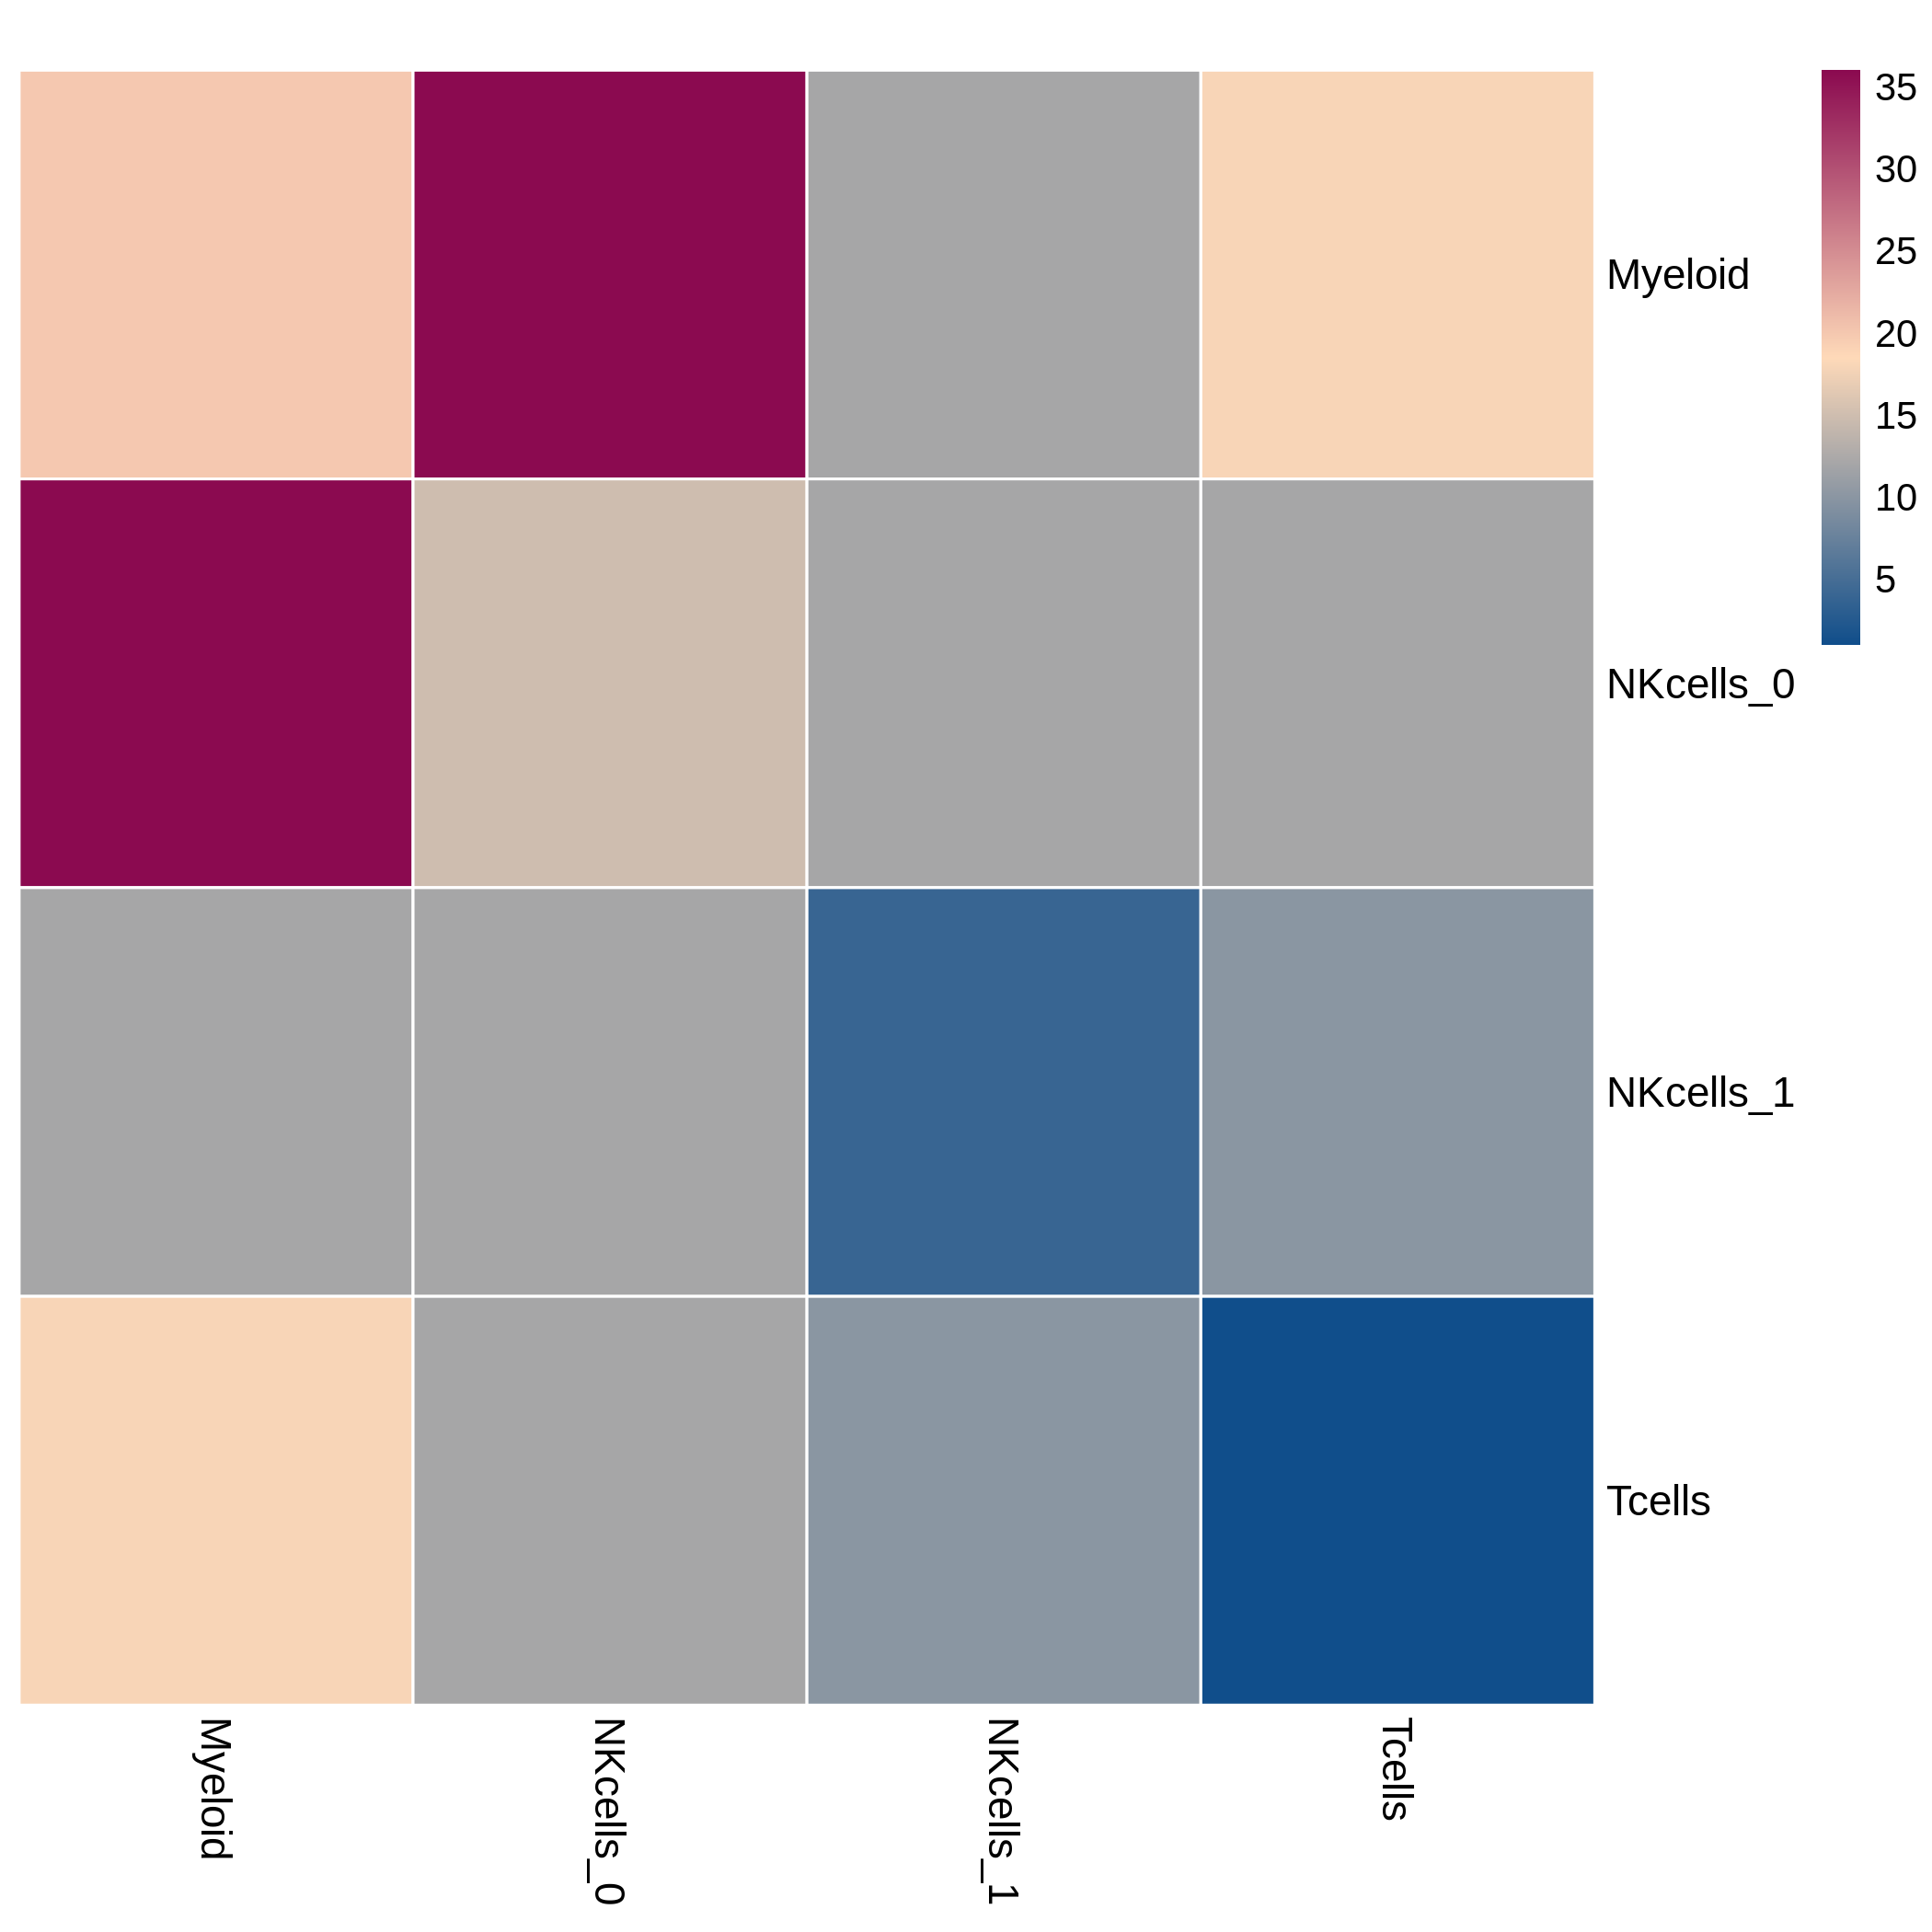
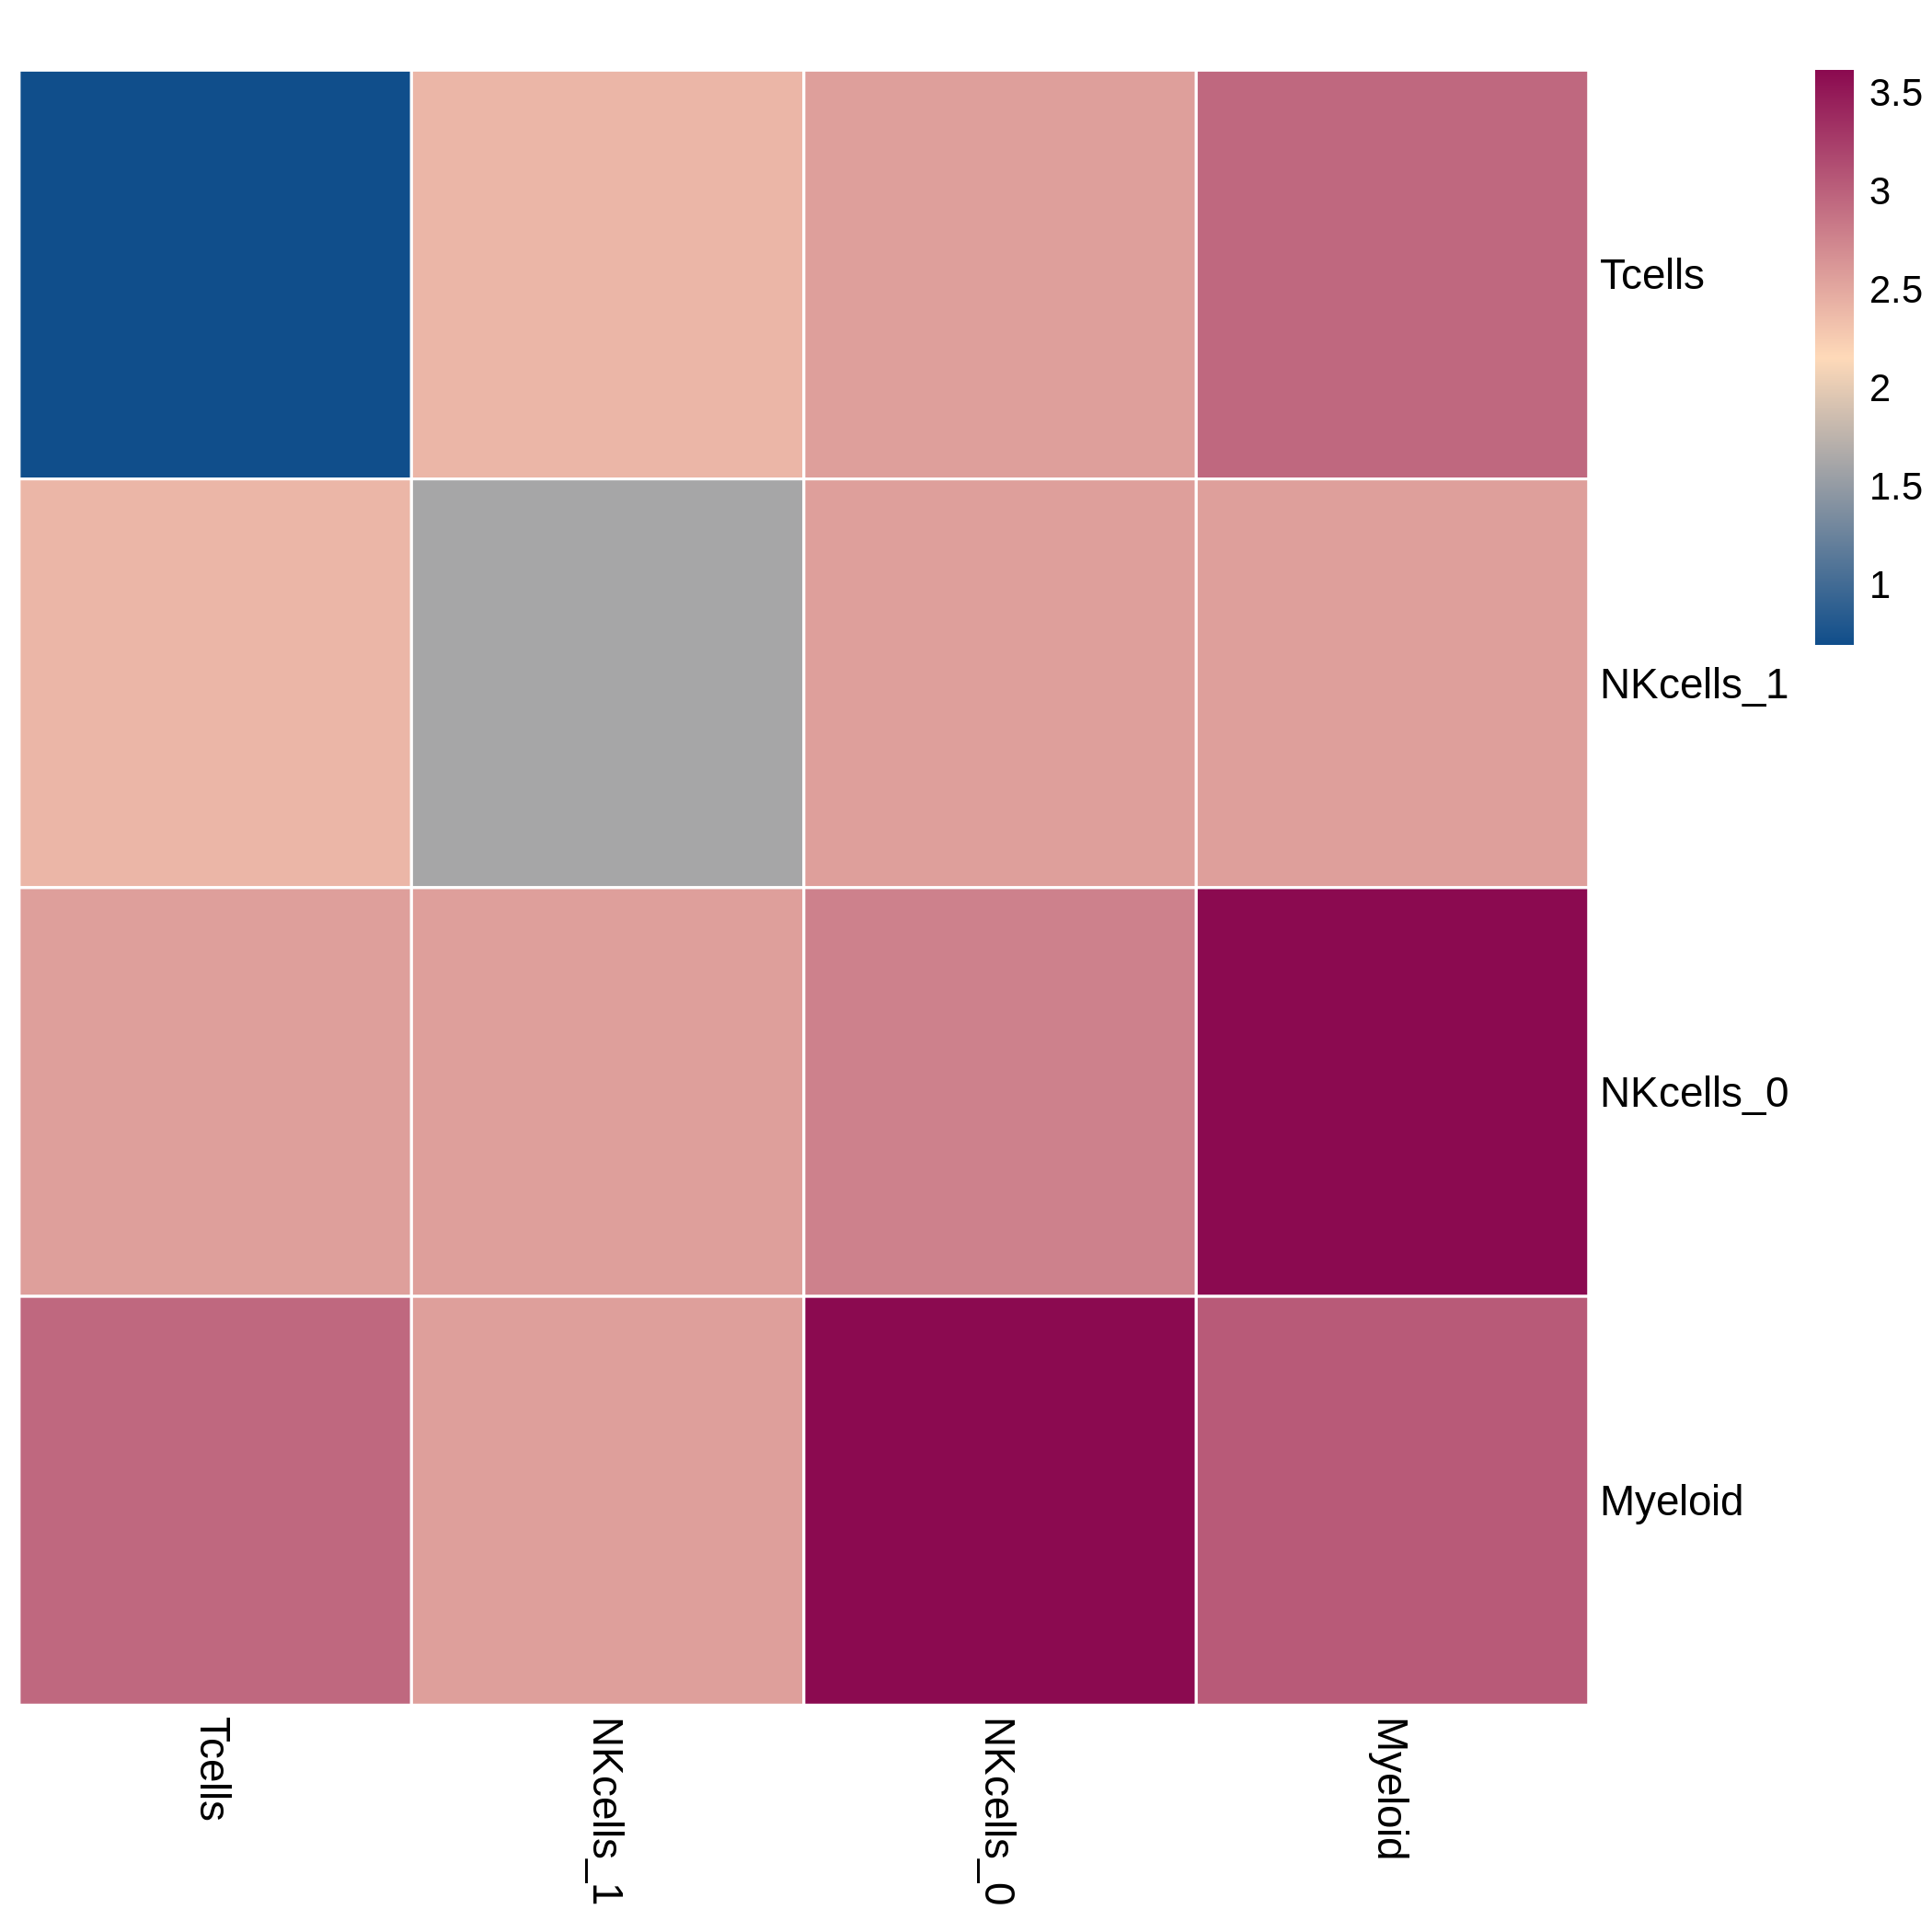

Edit by: Xie Zihong